# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определим рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [49]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


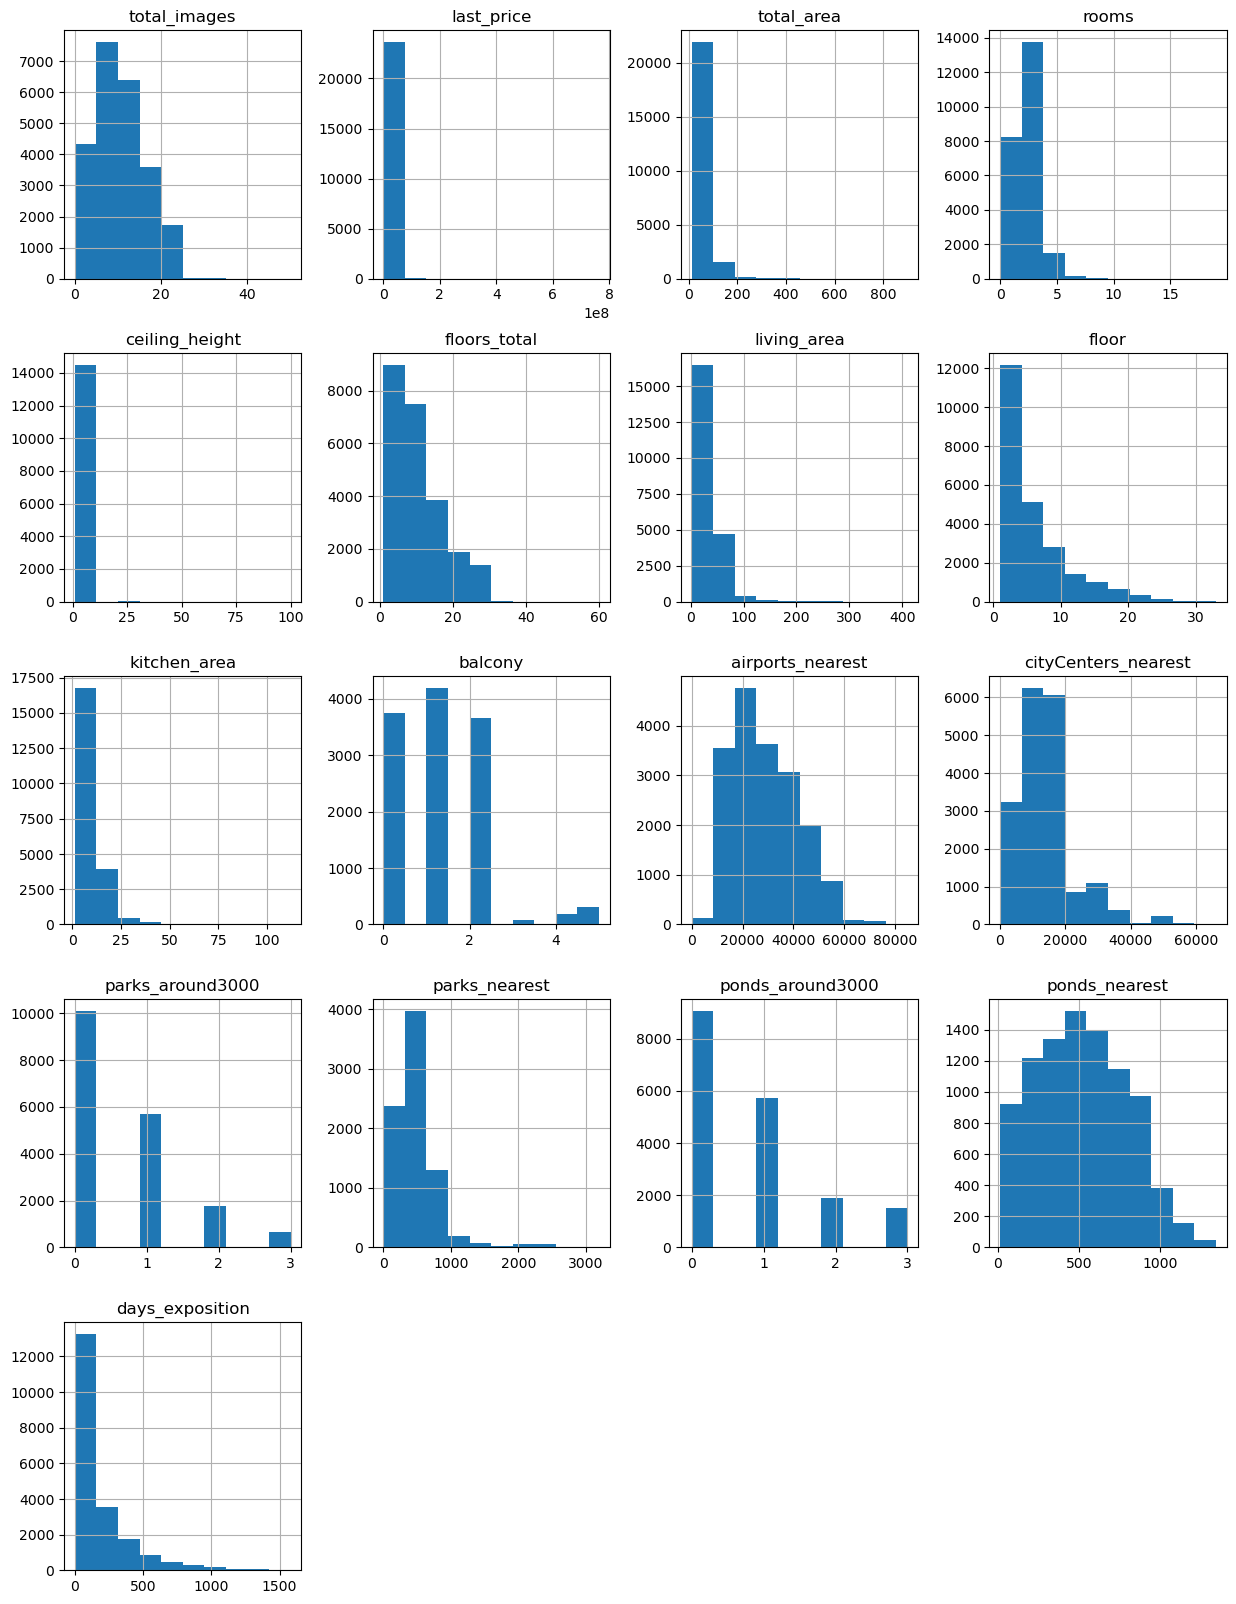

In [50]:
df.hist(figsize=(15, 20));

### Предобработка данных

In [51]:
#Просмотрим количество пропущенных значений каждого столбца:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [54]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

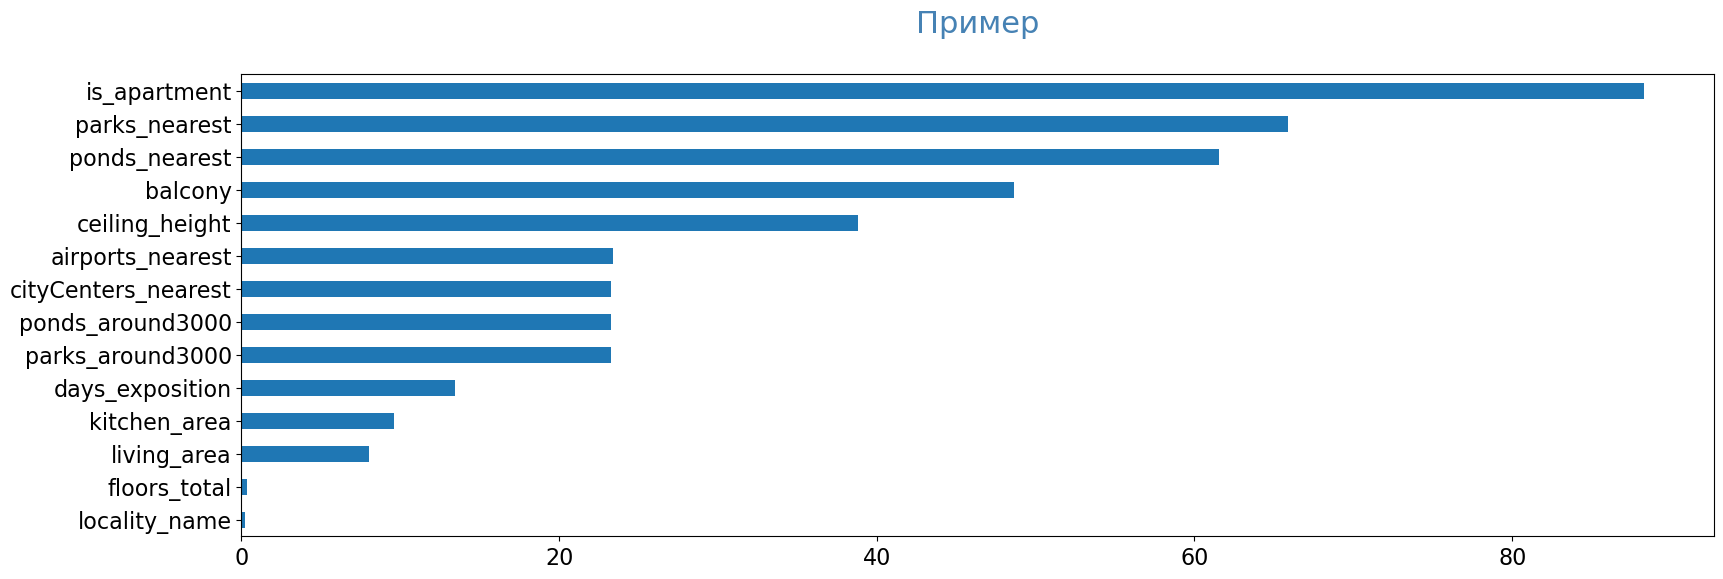

In [55]:
pass_value_barh(df)

### Заметили по количеству пропусков и их типу данных на настоящий момент:
1. first_day_exposition – должен быть тип datetime
2. is_apartment - значения bool
3. living_area - пропуски заменить на урседненные значения (что-то придумать с кол-вом знаков после запятой)
4. ceiling_height - пропуски заменить на нулевые значения
5. kitchen_area - пропуски заменить на усредненные значения
6. balcony - пропуски заменить на нулевые значения, заменить на тип "int"
7. locality_name - заполнить нулями
8. floors_total - заменить пропуски нулями + перевести в тип "int"
9. airports_nearest - нулевые значения
10. cityCenters_nearest, parks nearest, ponds_nearest - нулевые значения
11. parks_around3000, ponds_around3000, days_exposition - заменить на тип "int" и заменить пропуски нулевыми значениями

In [56]:
# Посмотрим на высолту потолков:
max_height = range(10, 40)
len((df[['ceiling_height']].query('ceiling_height in @max_height')))

21

Аномальных значений в потолках прилично. Скорее всего, это опечатка. Разделим все потолки больше 10 на 10

In [57]:
df.loc[(df['ceiling_height'] > 10) & (df['ceiling_height'] < 40), 'ceiling_height'] = (
    df.loc[(df['ceiling_height'] > 10) & (df['ceiling_height'] < 40), 'ceiling_height']/10)
# len((df[['ceiling_height']].query('ceiling_height in @max_height')))

In [58]:
#привели столбец first_day_exposition к типу datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d') 


#Приводим столбец last_price  к целочисленному типу
df['last_price'] = df['last_price'].astype('int')


#Заменяем значения living area на усредненные; для этого нужно посчитать 
# среднюю долю гостинной от общей площади и умножить ее на соответствующую
# величину общей площади квартиры в строке
df['living_area'] = df['living_area'].fillna(df['living_area'].mean()/df['total_area'].mean()*df['total_area'])
# df['living_area'].isna().sum()


#Заполняем ceiling_height медианными значениями, так как в колонке почти половина пропусков
#Т.к есть выбросы
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())



#Заполним kitchen_area аналогично lving_area:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].mean()/df['total_area'].mean()*df['total_area'])



# Изменим тип данных и заменим пропущенные значения на ноль в 'balcony'
# Балконов может просто не быть, можем ставить ноль
# Балконы измеряются в штуках, поэтому приводим к типу "int"
df['balcony'] = df['balcony'].fillna(0).astype('int')
# df['balcony'].isna().sum()


#По столбцам locality_name и floors_total удалим строки из датафрейма, 
#в которых содержатся пропущенные значения, так как количество пропусков 
#в столбцах floors_total(89) и locality_name(49) незначительно
# Но играет большую роль в выборе квартиры.
df.dropna(subset = ['locality_name'], inplace = True)
# df['locality_name'].isna().sum()

df.dropna(subset = ['floors_total'], inplace = True)
# df['floors_total'].isna().sum()


#airports_nearest, cityCenters_nearest, parks nearest, ponds_nearest: заполняем пропуски нулями
list_1 = ['cityCenters_nearest','parks_nearest', 'ponds_nearest', 'airports_nearest']
for loc in list_1:
    df[loc] = df[loc].fillna(0)
    
    
#parks_around3000, ponds_around3000, days_exposition: заменяем на целочисленный тип и заполняем пропуски нулями    
list_2 = ['parks_around3000', 'ponds_around3000']
for i in list_2:
    df[i] = df[i].fillna(0).astype('int')

df['days_exposition'] = df['days_exposition'].fillna(0)

In [59]:
len(df[['total_area', 'living_area', 'kitchen_area']].query('total_area * 0.9<= living_area + kitchen_area'))

657

In [60]:
#Посмотрим на значения столбца is_apartment:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

**Как мы видим, уникальных значений в стобце "is_apartment" трое: true, false, nan. Но значение "NaN" появляется 20924 раза из всей таблицы длиной 23669. Такие данные нельзя использовать в исследовании и невозможно их чем-то заменить. Лучшим решением на этом этапе будет сообщить об ошибке собираемых данных.**

In [61]:
#Проверка пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition             0
dtype: int64

Все пропущенные значения удалены, за исключением столбца is_apartment 

In [62]:
#Поиск неявных дубликатов: 
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Как можно видеть, в каждом элементе массива, который содержал букву "ё", теперь вместо нее стоит буква "е". Таким образом, избегаем повторов "поселок" и "посёлок"

In [63]:
# check
df.locality_name.nunique()

330

In [64]:
# check
data = df.copy()

In [65]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [66]:
df['floors_total'] = df['floors_total'].astype('int')

In [67]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00"
min,0.00,12.00,1.00,0.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


Остались аномалии и редкости (в т.ч. и хвосты) в колонках: 
        
'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'
        
Стоит обратить внимание на минимальные и максимальные значения в выборке и учесть наличие пропусков при фильтрации данных
        


count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

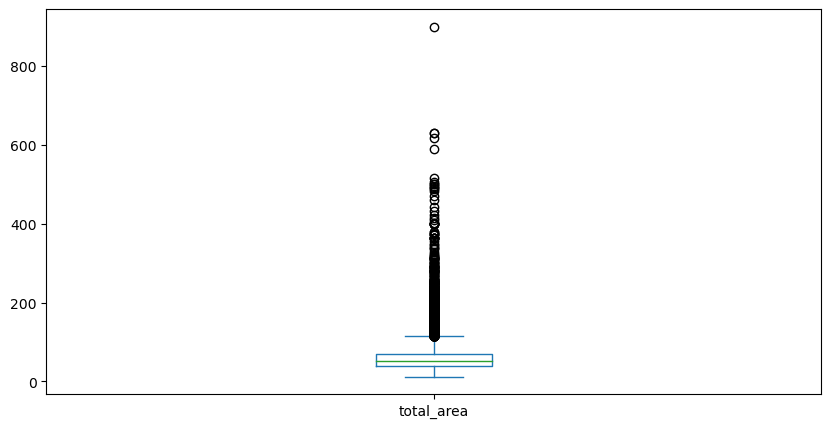

In [68]:
df.total_area.plot(kind = 'box', figsize = (10,5))
df.total_area.describe()

<AxesSubplot:ylabel='Frequency'>

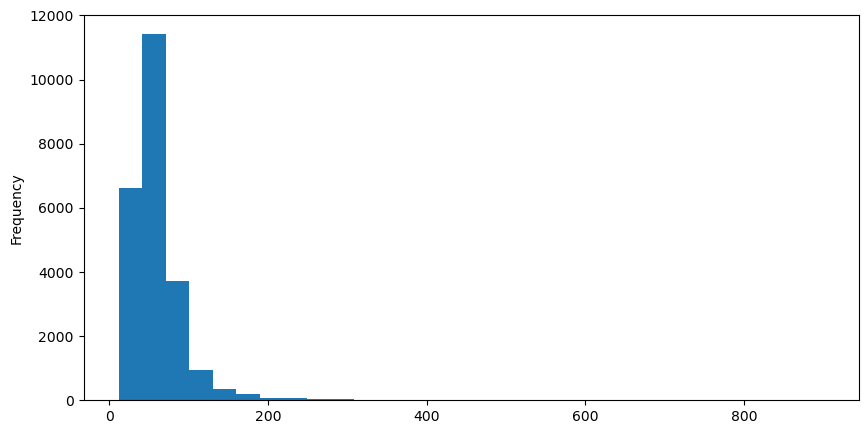

In [69]:
df.total_area.plot(kind = 'hist', bins = 30, figsize = (10,5))

Квартиры с общей площадью после 200 кв метров почти не встречаются. Посмотрим на количество таких

In [70]:
len(df[df['total_area'] >= 210])

206

Немного, можем избавиться от них

In [71]:
df = df.loc[df['total_area'] < 210]

<AxesSubplot:ylabel='Frequency'>

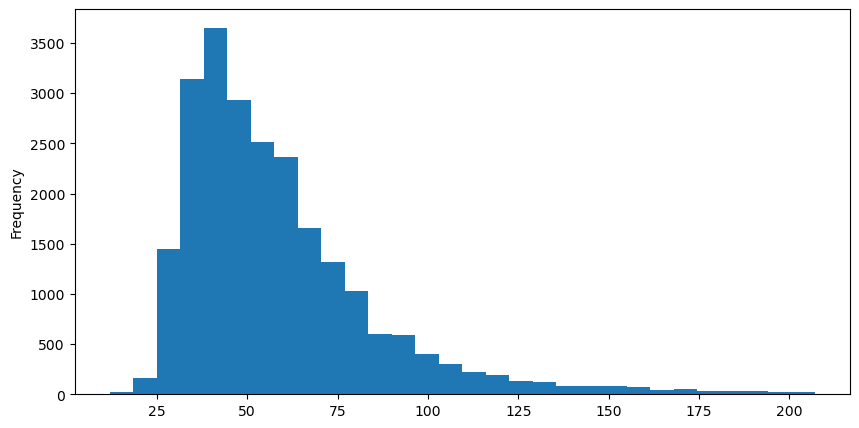

In [72]:
df.total_area.plot(kind = 'hist', bins = 30, figsize = (10,5))

In [73]:
df.ceiling_height.describe()

count    23359.000000
mean         2.697687
std          0.674860
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [75]:
len(df[df['ceiling_height'] > 4]) 
# 39
len(df[df['ceiling_height'] < 2.5])
# 77

78

Видим, что большая часть квартир с высотой потолков 2,5м, но также присуствуют квартиры с высотой 3,5. Можем спокойно отрезать потолки с высотой 3.5м и больше.

<AxesSubplot:>

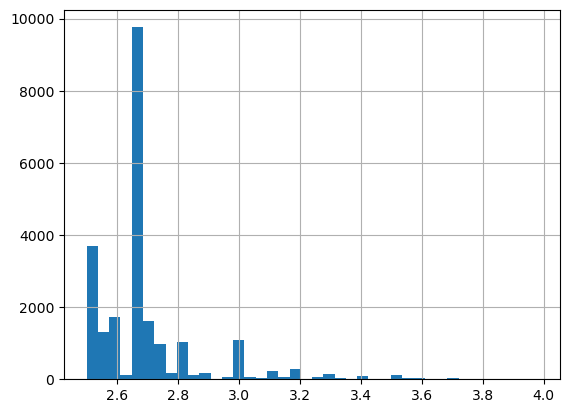

In [76]:
df = df.loc[(df['ceiling_height'] >= 2.5) & (df['ceiling_height'] < 4)]
df['ceiling_height'].hist(bins = 40)

,count,mean,std,min,25%,50%,75%,max
last_price,23210.0,6.025756e+06,6.238485e+06,12190.0,3400000.0,4600000.0,6695000.0,330000000.0


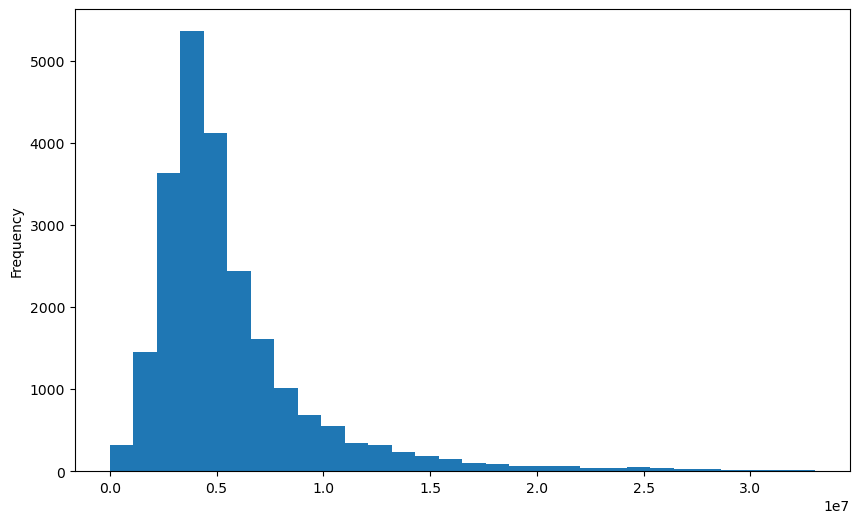

In [82]:
df.last_price.plot(kind = 'hist', bins = 30, figsize = (10,6), range = (12190,33000095))
df[['last_price']].describe().T

По оси х отложены величины в 1е7 = 10.000.000. В среднем квартира стоит 5-6млн. Можем смело отбрасывать

count    2.267200e+04
mean     5.387244e+06
std      3.157444e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.494518e+06
max      1.999900e+07
Name: last_price, dtype: float64

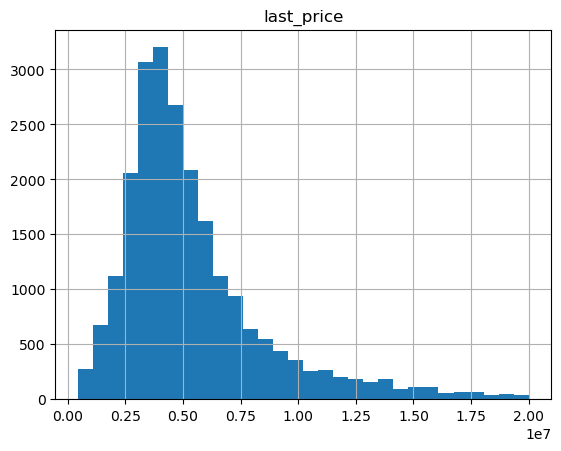

In [83]:
df = df.loc[(df['last_price'] < 20000000) & (df['last_price'] >= 200000)]
df.hist('last_price', bins = 30)
df.last_price.describe()

count    22672.000000
mean        32.322896
std         15.898443
min          2.000000
25%         18.740980
50%         30.000000
75%         41.000000
max        160.000000
Name: living_area, dtype: float64

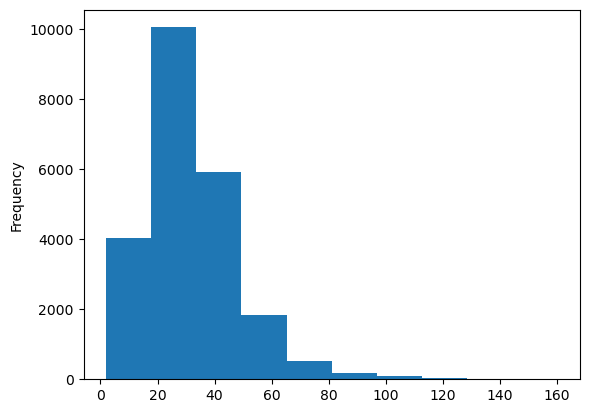

In [84]:
df.living_area.plot(kind = 'hist')
df.living_area.describe()

count    22542.000000
mean        32.106741
std         15.055190
min         10.080000
25%         18.800000
50%         30.000000
75%         41.000000
max        110.000000
Name: living_area, dtype: float64

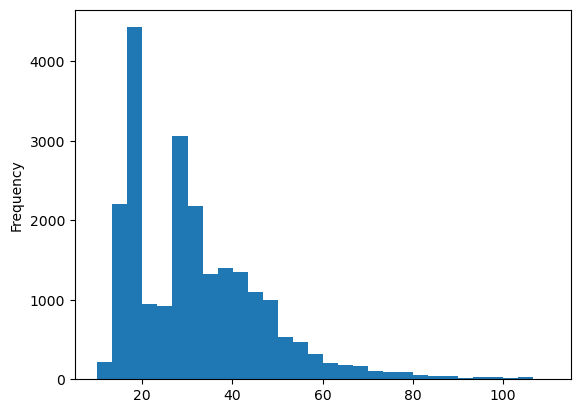

In [85]:
df = df.loc[(df['living_area'] <= 110) & (df['living_area'] > 10)]
df.living_area.plot(kind = 'hist', bins = 30)
df.living_area.describe()

count    22542.000000
mean         9.945571
std          4.562479
min          1.300000
25%          7.000000
50%          9.000000
75%         11.400000
max         64.000000
Name: kitchen_area, dtype: float64

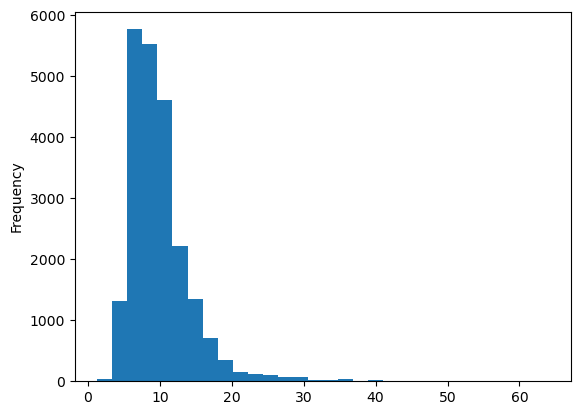

In [86]:
df.kitchen_area.plot(kind = 'hist', bins = 30)
df.kitchen_area.describe()

count    22335.000000
mean         9.836960
std          4.035582
min          4.028351
25%          7.000000
50%          9.000000
75%         11.365000
max         34.780000
Name: kitchen_area, dtype: float64

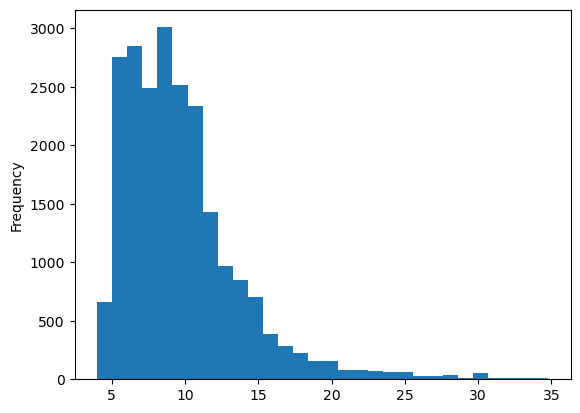

In [87]:
df = df.loc[(df['kitchen_area'] > 4) & (df['kitchen_area'] < 35)]
df.kitchen_area.plot(kind = 'hist', bins = 30)
df.kitchen_area.describe()

In [88]:
df.floors_total.describe()

count    22335.000000
mean        10.777255
std          6.631882
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

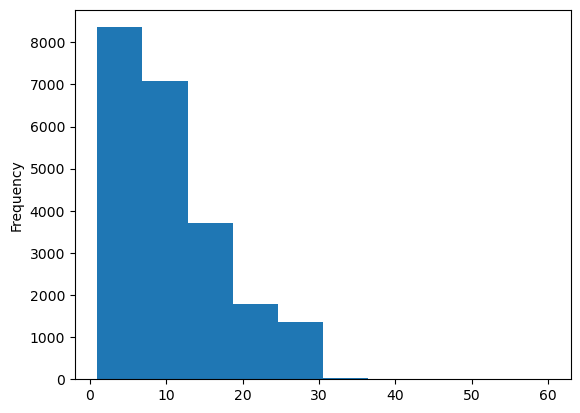

In [89]:
df.floors_total.plot(kind = 'hist')

После 30 резкий спад графика. Можем смело отрезать этот хвост

In [90]:
df = df.loc[df['floors_total'] < 30]
df.floors_total.describe()

count    22304.000000
mean        10.741706
std          6.564573
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

In [91]:
(
        df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
              'floor', 'floors_total']]
        .apply (['count', 'min', 'max'])   
        .style.format("{:,.2f}")
    )

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,304.00","22,304.00","22,304.00","22,304.00","22,304.00","22,304.00","22,304.00","22,304.00","22,304.00"
min,0.00,20.00,2.50,0.00,"430,000.00",10.08,4.03,1.00,1.00
max,8.00,205.00,3.98,"1,580.00","19,999,000.00",110.00,34.78,27.00,29.00


In [92]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,0.00,23.00,2.50,0.00,"563,818.00",11.00,4.13,1.00,2.00
0.010000,1.00,27.00,2.50,0.00,"1,000,000.00",13.66,4.78,1.00,2.00
0.500000,2.00,51.00,2.65,73.00,"4,530,000.00",30.00,9.00,4.00,9.00
0.990000,5.00,131.69,3.47,"1,012.00","16,500,000.00",81.89,25.00,23.00,26.00
0.998800,6.00,168.47,3.80,"1,349.24","19,477,855.60",104.00,32.00,26.00,27.00


### Добавим в таблицу новые столбцы

In [93]:
# Вычисляем цену за один квадратный метр 
# округляем до 2 цифр после запятой
df['price_per_m'] = (df['last_price']/df['total_area']).round(2)


# Столбец для дня недели:
df['weekday'] = df['first_day_exposition'].dt.weekday
# для удобства можно воспользоваться методом strftime('%w')
# чтобы получить день недели как слово

# Столбец для месяца:
df['month'] = df['first_day_exposition'].dt.month


# Столбец для года:
df['year'] = df['first_day_exposition'].dt.year


# Разобьем тип этажей на три: "первый", "другой" и "последний". Напишем функцию:

def cat_floor(df):
    if df['floors_total'] == 1:
        if df['floors_total'] == df['floor']:
            return "первый"
    else:
        if df['floors_total'] == df['floor']:
            return 'последний'
        elif df['floor'] == 1:
            return 'первый'
        else:
            return 'другой'
            
# Применим функцию ко всем строкам датасета и создадим новый столбец для результатов:
df['floor_category'] = df.apply(cat_floor, axis = 1)


# Расстояние до центра в км:
# Разделим каждый показатель столбца cityCenters_nearest на 1000 и округлим до 2 цифр:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest']/1000).astype('int')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,floor_category,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,NaN,...,482.0,2,755.0,0.0,120370.37,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,NaN,...,0.0,0,0.0,81.0,82920.79,1,12,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,NaN,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,13
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.400000,5,NaN,...,0.0,0,0.0,55.0,95065.79,0,9,2018,другой,0
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.600000,6,NaN,...,0.0,0,0.0,155.0,99195.71,3,11,2017,другой,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,NaN,...,796.0,3,381.0,0.0,72490.85,1,3,2017,другой,4
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.000000,4,NaN,...,0.0,0,0.0,45.0,52542.37,0,1,2018,другой,0
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.700000,1,NaN,...,0.0,0,0.0,0.0,44091.71,6,2,2018,первый,0
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.822689,12,NaN,...,173.0,3,196.0,602.0,149511.40,1,3,2017,другой,10


Добавили в таблицу новые столбцы: категории этажей, ближайщее расстояние до центра в километрах, цена за квадратный метр (округлили до 2 знаков после запятой), день недели, месяц и год

In [94]:
len(df.loc[(df['floor_category'] == 'последний') & (df['floor'] == 1)])

0

Все норм

### Проведите исследовательский анализ данных

count    22304.000000
mean        55.950412
std         22.300937
min         20.000000
25%         40.000000
50%         51.000000
75%         66.800000
max        205.000000
Name: total_area, dtype: float64

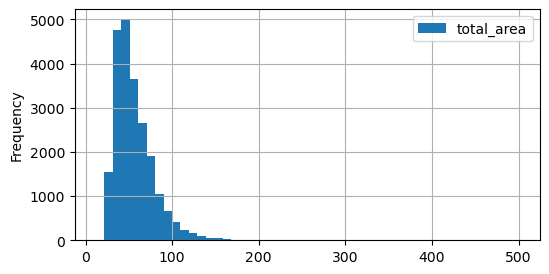

In [95]:
# Общая площадь
df.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, range = (12,500), figsize = (6,3))
df['total_area'].describe()

Большинство квартир с площадью до 100 кв. метров. После 100 уже меньше квартир, и после 200кв. метров квартиры уже практически не встречаются. Метод .describe() показывает, что в выборке есть квартира с площадью в 900кв метров. Продавец случайно ноль добавил?

count    22304.000000
mean        32.115181
std         15.007927
min         10.080000
25%         18.842329
50%         30.000000
75%         41.000000
max        110.000000
Name: living_area, dtype: float64

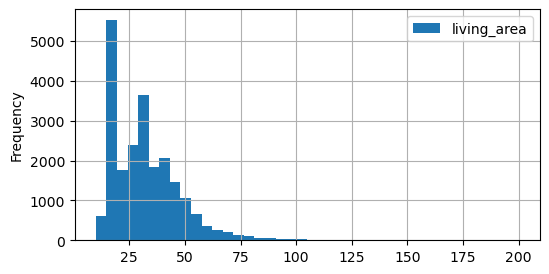

In [96]:
# Жилая площадь
df.plot(y = 'living_area', kind = 'hist', bins = 40, grid=True, range = (10,200), figsize = (6,3))
df['living_area'].describe()

Больше всего квартир с жилой площадью около 20м. После наблюдается спад, а потом пик на 30 квадратных метрах. Квартир с жилой площадью около 50 кв метров уже намного меньше

count    22304.000000
mean         9.830594
std          4.029031
min          4.028351
25%          7.000000
50%          9.000000
75%         11.340000
max         34.780000
Name: kitchen_area, dtype: float64

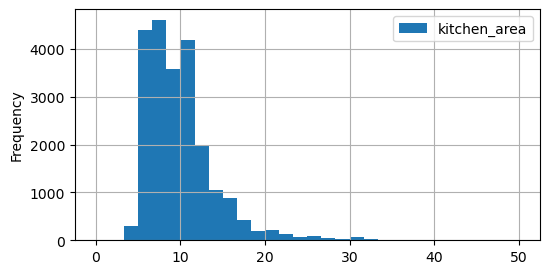

In [97]:
# Площадь кухни 
df.plot(y = 'kitchen_area', kind = 'hist', bins = 30, grid=True, range = (0,50), figsize = (6,3))
df['kitchen_area'].describe()

Кухни по большей части представлены от 5 до 15 метров. Больше 20 квадратных метров практически не встречаются

count    2.230400e+04
mean     5.333598e+06
std      3.057381e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.530000e+06
75%      6.400000e+06
max      1.999900e+07
Name: last_price, dtype: float64

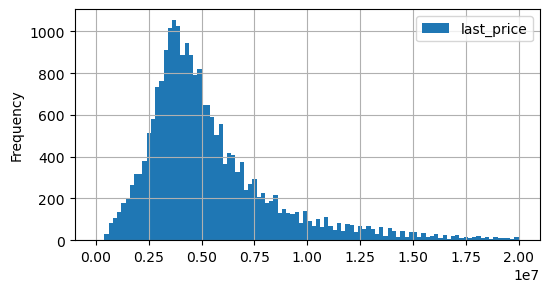

In [98]:
# Цена объекта
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,20000000), figsize = (6,3))
df['last_price'].describe()

График нормального распределения. Максимальная стоимость квартиры 763млн, среднее 6,5, медиана 4,6.

count    22304.000000
mean         1.996324
std          0.949793
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

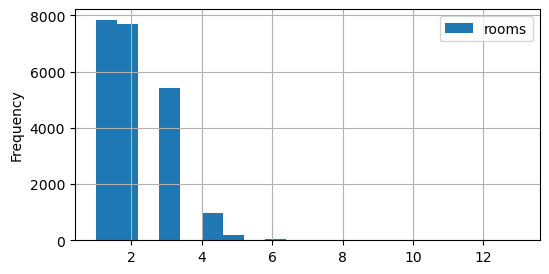

In [99]:
# Количество комнат
df.plot(y = 'rooms', kind = 'hist', bins = 20, range = (1,13), grid = True, figsize = (6,3))
df['rooms'].describe()

Больше всего квартир однокомнатных (8 тыс), но очень близко к этому значению и количество двухкомнатных квартир. Максимальное количество комнат 19, среднее 2

count    22304.000000
mean         2.680970
std          0.181625
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

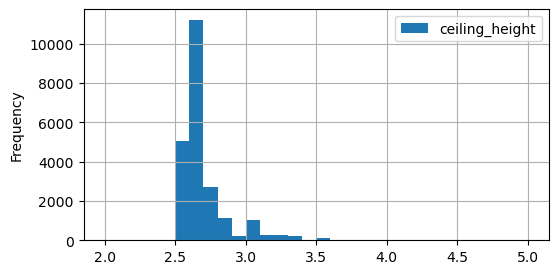

In [100]:
# Высота потолков
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, range = (2,5), figsize = (6,3))
df['ceiling_height'].describe()

Высота потолков в среднем составляет 2.72, большая часть квартир и продается с такими потолками: около 12тыс объявлений. С высотой потолков 3м тоже есть квартиры, их примерно 1тыс

count    22304.000000
mean         5.876749
std          4.864344
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

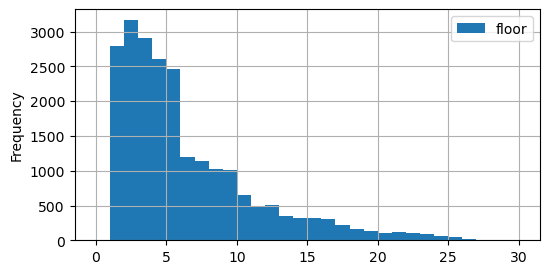

In [101]:
# Этаж квартиры
df.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, range = (0,30), figsize = (6,3))
df['floor'].describe()

Большая часть квартир продается на 5 этаже и ниже. Выше 10 этажа квартир значительно меньше, а выше 25 этажей квартиры почти не встречаются

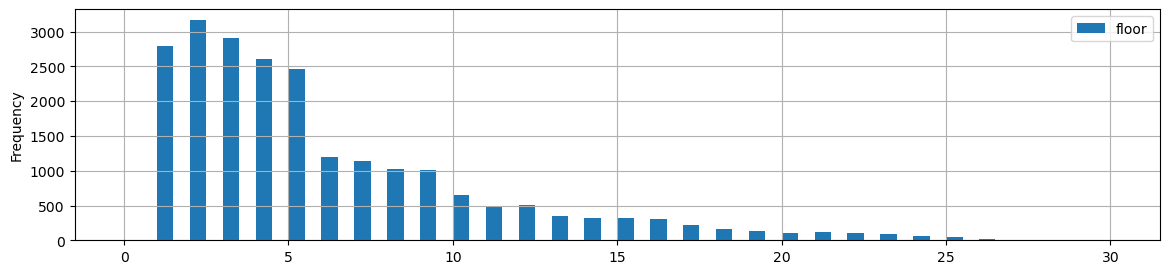

In [102]:
# check

df.plot(y = 'floor', kind = 'hist', bins = 60, grid=True, range = (0,30), figsize = (14,3));

<AxesSubplot:>

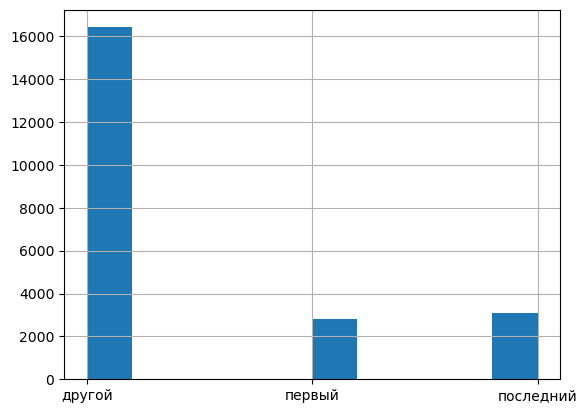

In [103]:
# Тип этажа квартиры
df['floor_category'].hist(bins = 10)

Большая часть квартир на этаже где-то посередине. Логичное распределение!

count    22304.000000
mean        10.741706
std          6.564573
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

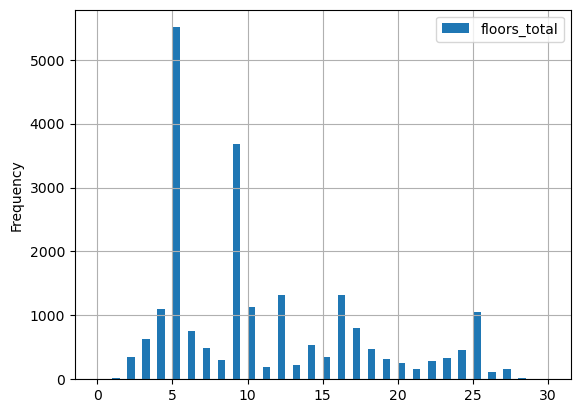

In [104]:
df.plot(y = 'floors_total', kind = 'hist', bins = 60, grid = True, range = (0,30))
df['floors_total'].describe()

Чаще всего продаются квартиры в пятиэтажных домах, потом идет резкий спад до 10 этажей. 10-этажных домов тоже немало. После 25-этажных, домов выше почти не встречается

count    22304.000000
mean     11059.246951
std       9715.616098
min          0.000000
25%       1827.500000
50%      11551.000000
75%      15396.250000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

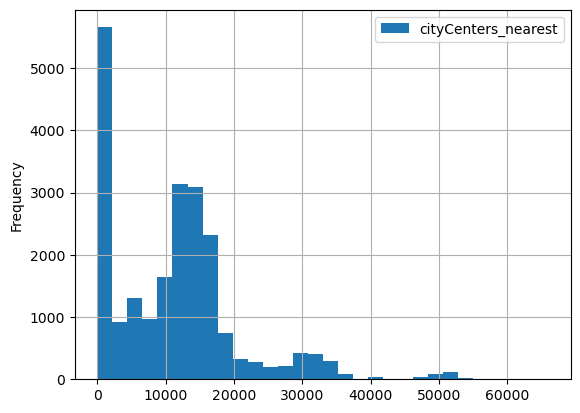

In [105]:
df.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid = True)
df['cityCenters_nearest'].describe()

Как мы видим, сильный пик у 10000 - расстояние до центров; после 20000 редко встречаются квартиры

count    22304.000000
mean     21907.996279
std      16672.062367
min          0.000000
25%       9527.750000
50%      21415.000000
75%      34631.000000
max      84869.000000
Name: airports_nearest, dtype: float64

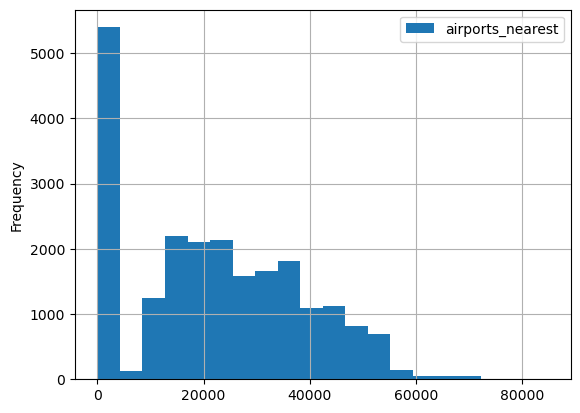

In [106]:
df.plot(y = 'airports_nearest', kind = 'hist', bins = 20, grid = True)
df['airports_nearest'].describe()

Много квартир расположено близко к аэропорту. Также наблюдается пик у значения 20000км от аэропорта. После 30000 наблюдается резкий спад, а потом после 60000 квартир почти не наблюдается

count    22304.000000
mean       161.453551
std        303.216283
min          0.000000
25%          0.000000
50%          0.000000
75%        280.250000
max       3190.000000
Name: parks_nearest, dtype: float64

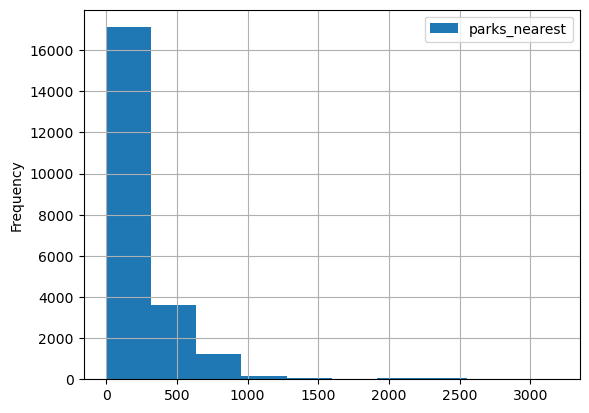

In [107]:
df.plot(y = 'parks_nearest', kind = 'hist', bins = 10, grid = True)
df['parks_nearest'].describe()

Больше всего квартир ближе к парку

<AxesSubplot:ylabel='Frequency'>

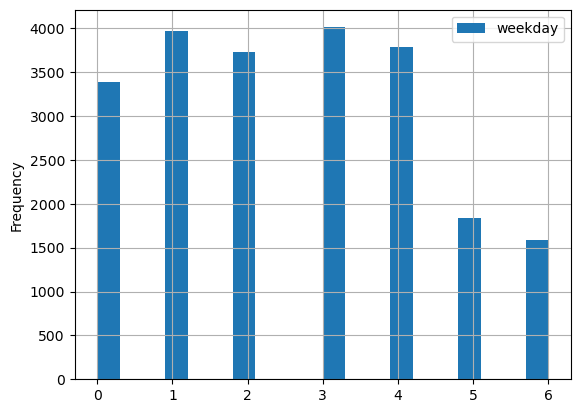

In [108]:
df.plot(y = 'weekday', kind = 'hist', bins = 20, grid = True)

По дням объявления довольно равномерно распределены, за исключением субботы и воскресенья. Большая часть объявлений вывешивалось в четверг и вторник

<AxesSubplot:ylabel='Frequency'>

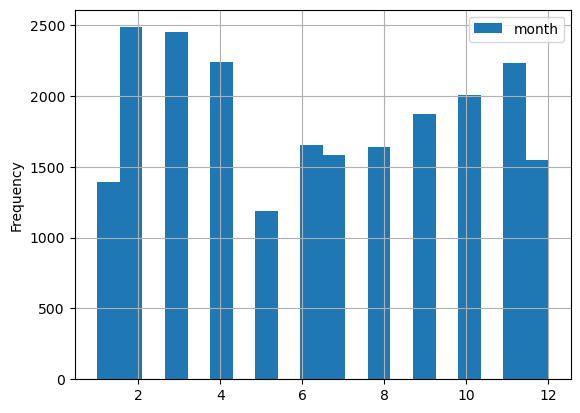

In [109]:
df.plot(y = 'month', kind = 'hist', bins = 20, grid = True)

Здесь наблюдается закономерность. Мало кто продает квартиры в начале и конце года, зато в феврале было вывешено свыше 2500 квартир. После февраля идет спад до мая месяца, после чего опять количество объявлений увеличивается до декабря. В декабре и апреле было примерно одинаковое количество объявлений

count    22304.000000
mean       154.424498
std        210.023044
min          0.000000
25%         23.000000
50%         73.000000
75%        195.000000
max       1580.000000
Name: days_exposition, dtype: float64

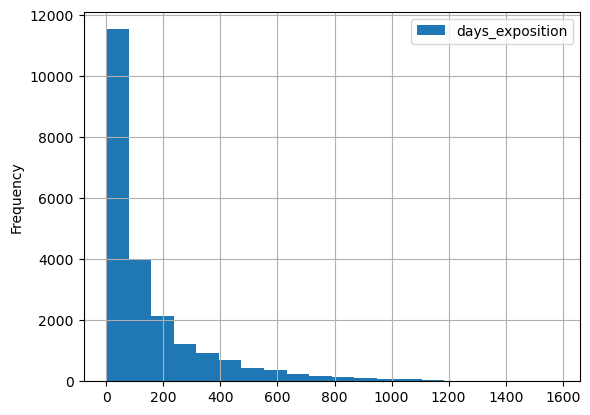

In [110]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 20, grid = True)
df['days_exposition'].describe()

count    11298.000000
mean        83.985396
std         46.484759
min         22.000000
25%         45.000000
50%         71.000000
75%        117.000000
max        193.000000
Name: days_exposition, dtype: float64

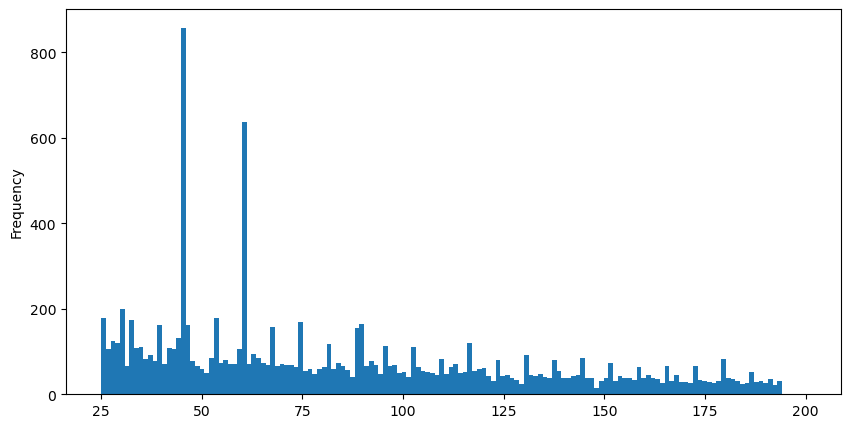

In [111]:
data = df.copy()
data = data.loc[(data['days_exposition'] > 22) & (data['days_exposition'] < 194)]
data.days_exposition.plot(kind = 'hist', bins = 150, range = (25,200), figsize = (10,5))
data.days_exposition.describe()

<AxesSubplot:>

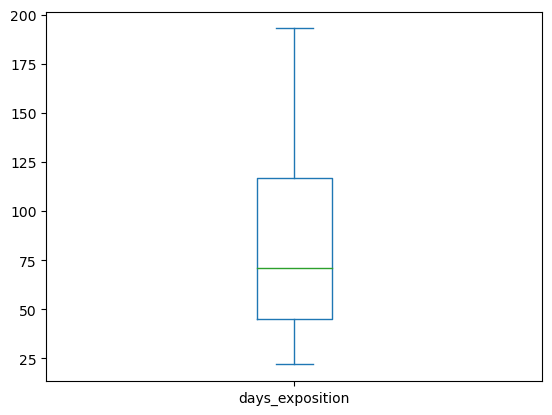

In [112]:
data.days_exposition.mode()
data.days_exposition.plot(kind = 'box')

Без заглушек медиана 84, с заглушками - 150. Если ориентироваться на 25 и 75 квантили, то быстрыми продажами можно назвать продажи в сроках от 22 до 45 дней. Долгими продажами считаем сроки от 117 до 193. На гистограмме видны резкие скачки около 45 и 60. Действительно, метод .value_counts() показывает именно эти самые частые значения:

In [113]:
data.days_exposition.value_counts()

45.0     858
60.0     533
30.0     200
90.0     164
44.0     132
        ... 
129.0     25
184.0     25
187.0     24
192.0     22
148.0     15
Name: days_exposition, Length: 172, dtype: int64

In [114]:
# Посмотрим, как указанные в задании параметры коррелируют с общей стоимостью квартиры.
# Для начала построим матрицу корреляций:
df.corr().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,cityCenters_nearest_km
total_images,1.00,0.15,0.11,0.09,0.02,0.01,0.09,0.03,-0.02,-0.02,...,0.02,0.02,-0.01,0.00,-0.06,0.13,-0.01,0.00,0.15,0.01
last_price,0.15,1.00,0.76,0.49,0.41,0.13,0.66,0.10,-0.05,-0.04,...,0.28,0.25,0.30,0.19,0.06,0.65,-0.02,0.01,-0.02,0.03
total_area,0.11,0.76,1.00,0.80,0.34,-0.04,0.93,-0.03,-0.09,-0.06,...,0.15,0.11,0.16,0.09,0.10,0.06,-0.01,0.01,-0.07,-0.05
rooms,0.09,0.49,0.80,1.00,0.17,-0.23,0.88,-0.17,-0.15,-0.09,...,0.11,0.06,0.08,0.04,0.07,-0.13,-0.00,0.00,-0.04,-0.03
ceiling_height,0.02,0.41,0.34,0.17,1.00,-0.05,0.30,-0.03,0.01,-0.00,...,0.22,0.11,0.20,0.08,0.06,0.25,-0.02,-0.00,-0.05,-0.12
floors_total,0.01,0.13,-0.04,-0.23,-0.05,1.00,-0.16,0.67,0.07,0.05,...,-0.14,-0.06,-0.05,0.03,-0.02,0.30,0.01,0.02,0.00,0.09
living_area,0.09,0.66,0.93,0.88,0.30,-0.16,1.00,-0.12,-0.06,-0.04,...,0.15,0.10,0.14,0.08,0.09,-0.02,-0.01,0.00,-0.06,-0.05
floor,0.03,0.10,-0.03,-0.17,-0.03,0.67,-0.12,1.00,0.04,0.04,...,-0.10,-0.04,-0.03,0.02,-0.02,0.22,0.01,0.02,0.00,0.06
studio,-0.02,-0.05,-0.09,-0.15,0.01,0.07,-0.06,0.04,1.00,-0.00,...,-0.03,-0.02,-0.01,-0.01,-0.02,0.04,-0.01,0.00,0.01,-0.02
open_plan,-0.02,-0.04,-0.06,-0.09,-0.00,0.05,-0.04,0.04,-0.00,1.00,...,-0.02,-0.01,-0.01,-0.00,-0.02,0.01,0.01,0.02,-0.02,-0.02


На полную стоимость объекта большее влияние оказывает общая площадь (столбец total_area) - 0,69. Также хорошо коррелируют между собой стоимость с ценой на квадратный метр, разумеется - 0,61. Стоимость объекта с жилой площадью - 0,57, а также стоимость объекта с количеством комнат - 0,45.¶


Для полной ясности визуализируем результаты для интересующих нас параметров

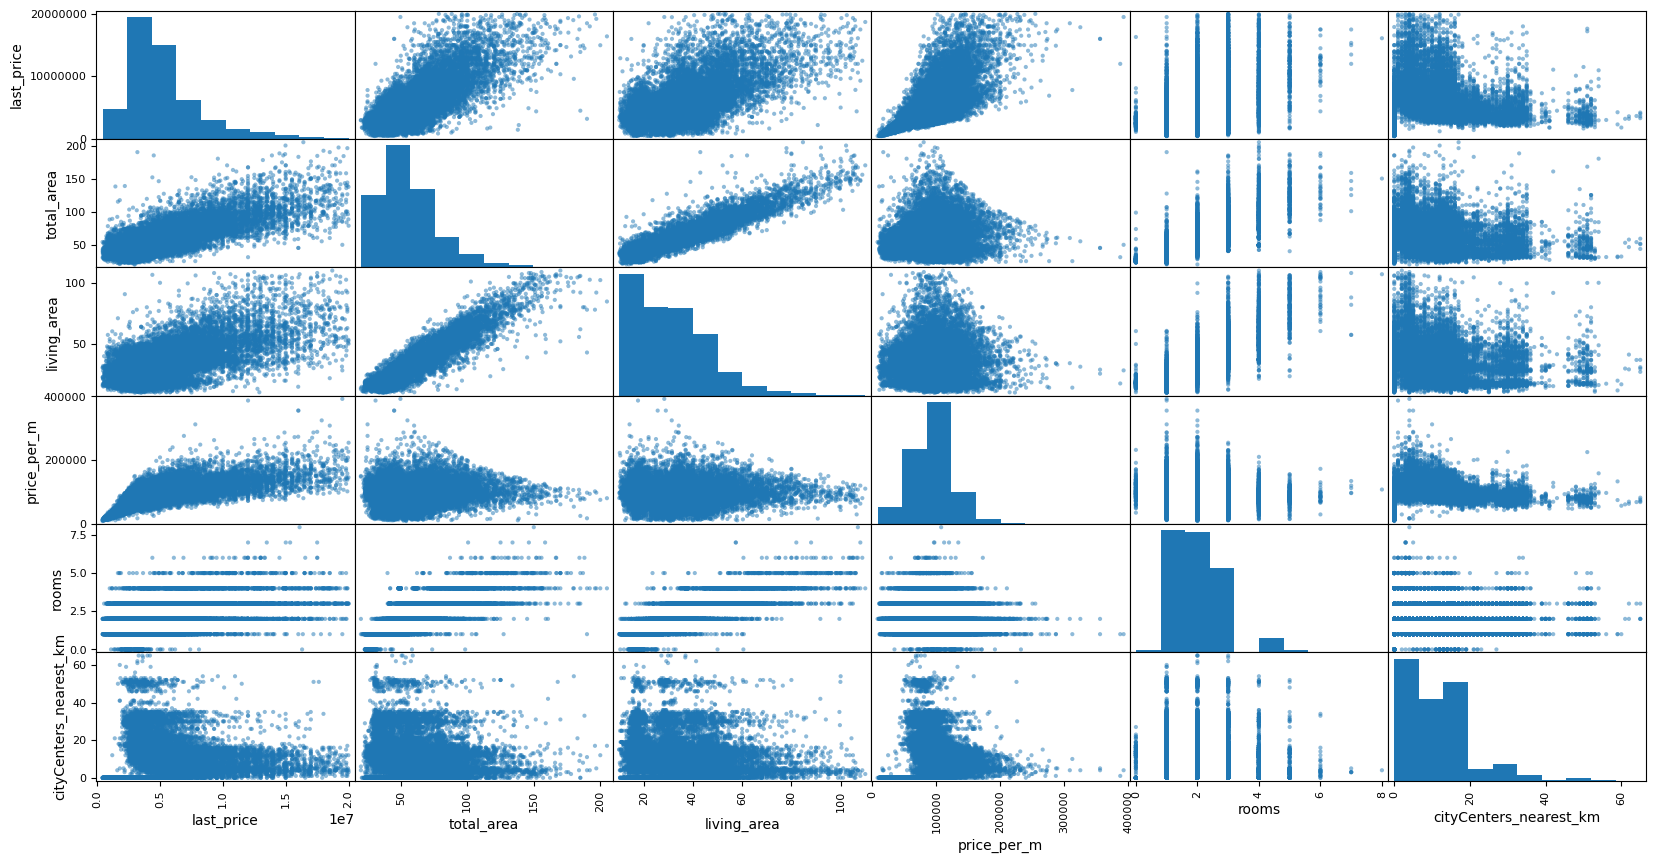

In [115]:
list_parameters = ['last_price', 'total_area', 'living_area', 'price_per_m', 'rooms', 'cityCenters_nearest_km']
pd.plotting.scatter_matrix(df[list_parameters],figsize=(20,10));

Самая четкая корреляция у жилой площади с общей стоимостью. Также наблюдается положительная корреляция с остальными параметрами, кроме расстояния до центра

<AxesSubplot:title={'center':'Зависимость от типа этажа'}, xlabel='floor_category'>

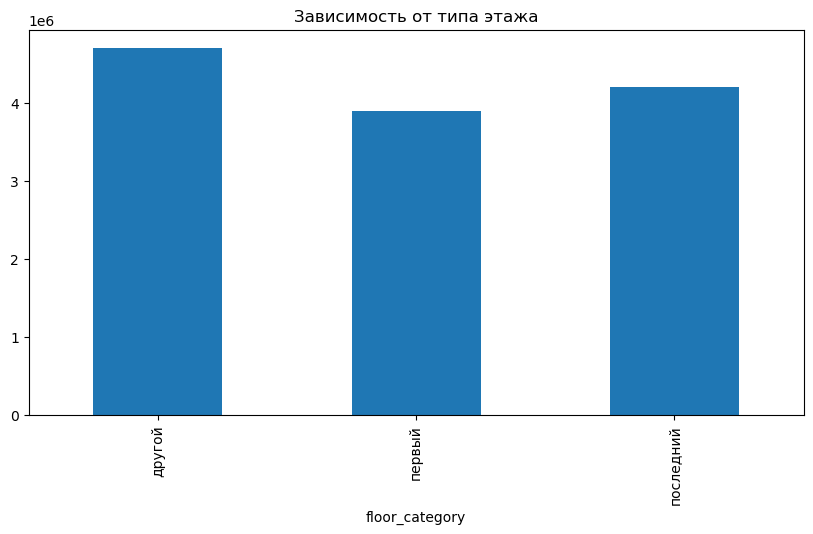

In [116]:
# Жил площадь:
df.groupby('floor_category')['last_price'].median().plot(kind='bar', figsize=(10,5), title='Зависимость от типа этажа')

Как видно, дешевле всего квартиры на первом этаже, затем на последнем, а потом уже другие

<AxesSubplot:title={'center':'Зависимость от дня публикации'}, xlabel='weekday'>

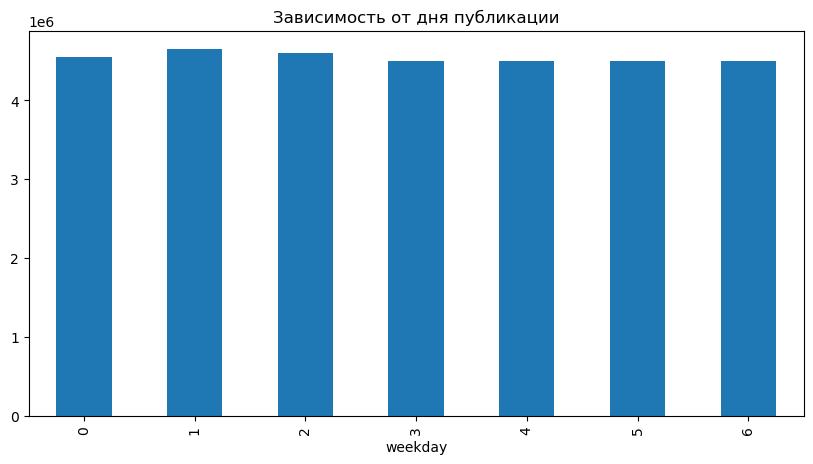

In [117]:
# День публикации
df.groupby('weekday')['last_price'].median().plot(kind = 'bar', figsize=(10,5), title='Зависимость от дня публикации')

Ничего интересного

<AxesSubplot:title={'center':'Зависимость от месяца публикации'}, xlabel='month'>

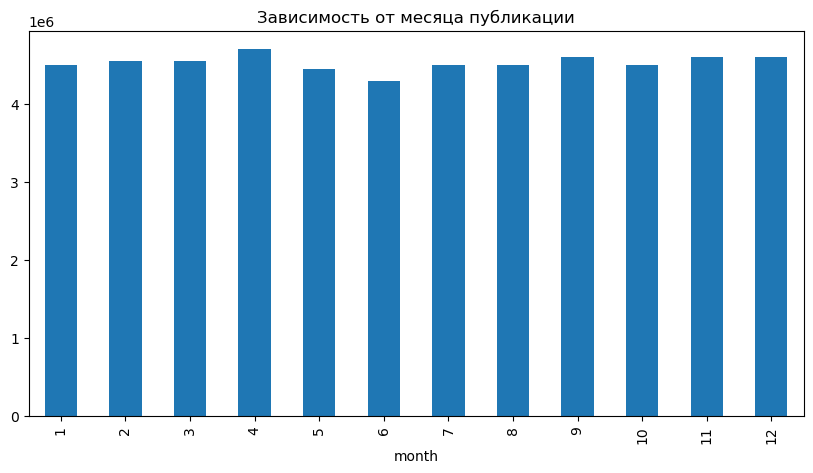

In [118]:
# Месяц публикации
df.groupby('month')['last_price'].median().plot(kind = 'bar', figsize = (10,5), title = 'Зависимость от месяца публикации')

То же самое. Сказать особо нечего, все столбцы примерно одинаковой длины. В апреле квартиры подороже, а в июне - подешевле, но значения различаются незначительно, так что на основе этого нельзя сделать какое-то заключение

<AxesSubplot:title={'center':'Зависимость от года публикации'}, xlabel='year'>

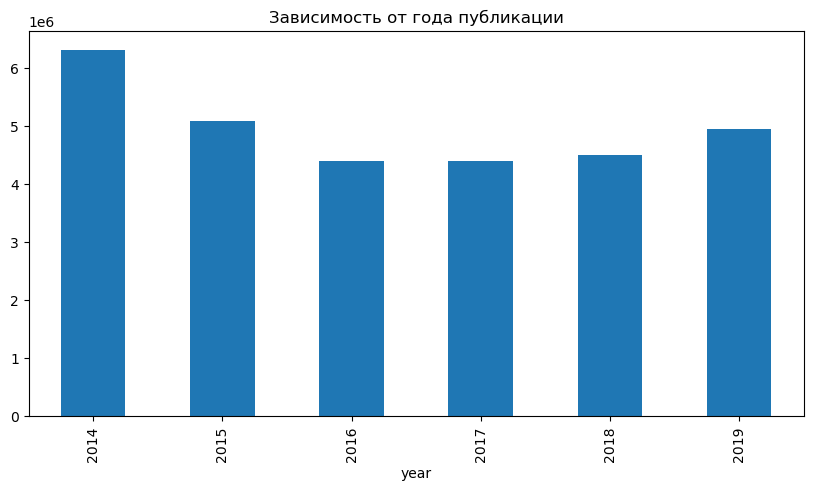

In [119]:
# Год публикации
df.groupby('year')['last_price'].median().plot(kind = 'bar', figsize = (10,5), title = 'Зависимость от года публикации')

<AxesSubplot:title={'center':'Зависимость общей площади от года'}, xlabel='year'>

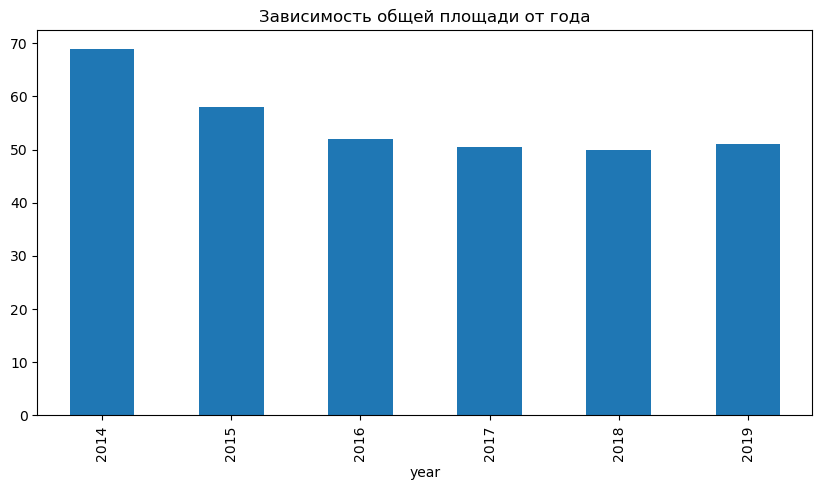

In [121]:
df.groupby('year')['total_area'].median().plot(kind = 'bar', figsize = (10,5), title = 'Зависимость общей площади от года')

<AxesSubplot:xlabel='year'>

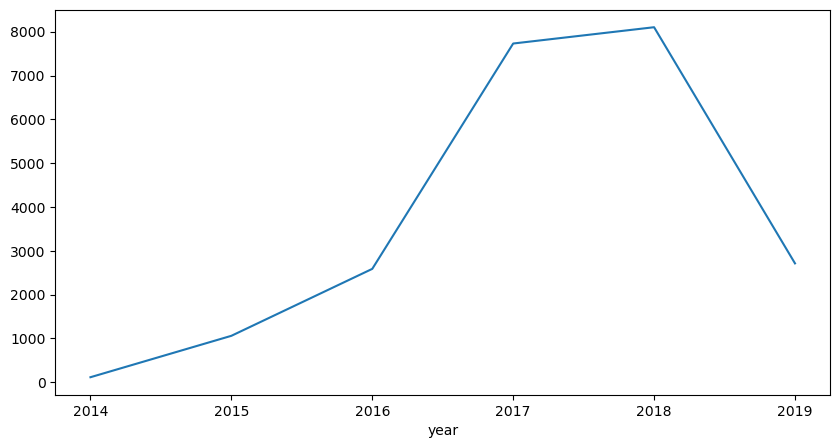

In [120]:
df.groupby('year')['year'].count().plot(kind = 'line', figsize = (10,5))

Медианная цена была больше всего в 2014-м году, а потом пошла на спад до 2017 года. После 17 года цена пошла наверх и более-менее крупный отрыв наверх виден в 2019 году. Также мы видим, что общая площадь квартир уменьшалась до 18 года и стала чуть больше в 19-м. На графике изменения количества предложений видно, что в 14 году было самое маленькое количество записей на отрезке. Затем количество начало стремительно расти до 2018 года (пик), а затем резко падало вплоть до 19 года. Этим может быть обусловлено поведение стоимости квартир, так как с большим количеством предложений рождается все большая конкуренция и цены на квартиры падают. Наблюдается также и обратный эффект после 2017 год. Виден резкий спад количества предложений с 2018 на 2019 год, и можно проследить на графике цены также отрыв, только наверх

## Топ-10 населенных пунктов по убыванию цены за квадратный метр

In [122]:
names = df['locality_name'].value_counts().index.tolist()[:10]
mean = [df[df['locality_name'] == name]['price_per_m'].median() for name in names]
df_10 = pd.DataFrame({'Населенный пункт' : names, 'Ср. Цена за квадратный метр' : mean})
df_10['Ср. Цена за квадратный метр'] = df_10['Ср. Цена за квадратный метр'].round(2)
df_10

,Населенный пункт,Ср. Цена за квадратный метр
0,Санкт-Петербург,103272.39
1,поселок Мурино,84922.64
2,поселок Шушары,76747.97
3,Всеволожск,65789.47
4,Пушкин,99431.82
5,Колпино,74722.22
6,поселок Парголово,91917.59
7,Гатчина,67796.61
8,деревня Кудрово,91831.88
9,Выборг,58158.32


<AxesSubplot:ylabel='Населенный пункт'>

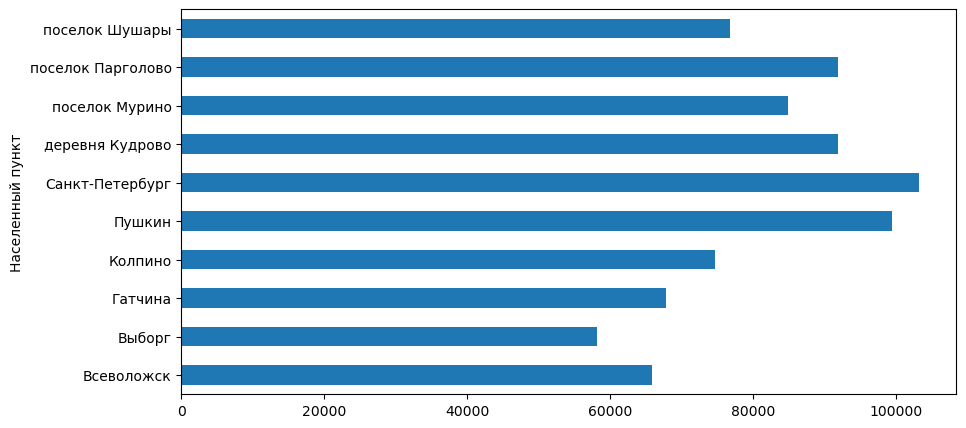

In [123]:
df_10.groupby('Населенный пункт')['Ср. Цена за квадратный метр'].median().plot(kind = 'barh', figsize = (10,5))

Самые дорогие квартиры в Санкт-Петербурге, самые дешевые - в Выборге. А можно было как-то по изящней решить эту задачу?

In [124]:
df_spb = df[df['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest_km')['last_price'].median().round(2)

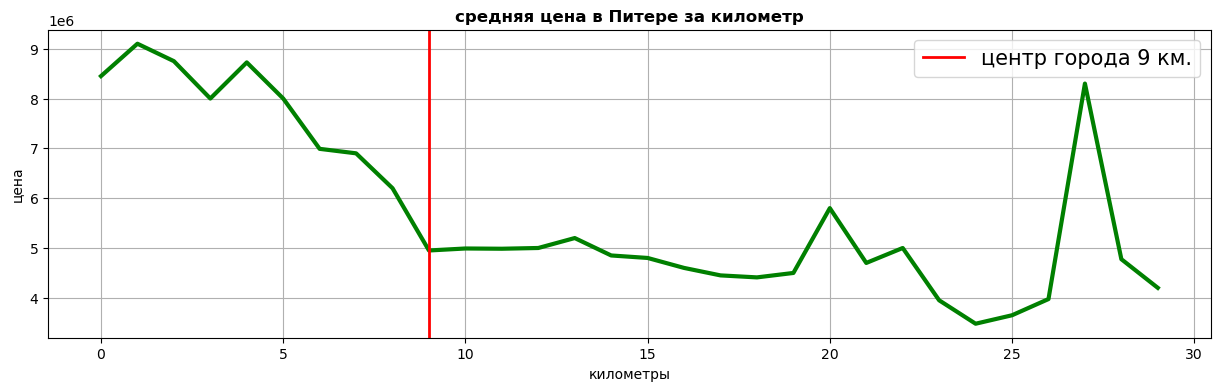

In [127]:
plt.figure(figsize=(15, 4))
plt.plot(df_spb, c='g', lw=3)
plt.title('средняя цена в Питере за километр', fontweight='bold')
plt.xlabel('километры')
plt.ylabel('цена') 
plt.axvline(x=df_spb.index[9], label=f'центр города {df_spb.index[9]} км.', lw=2, c='r')
plt.legend(fontsize = 15)
plt.grid();

### Появилась аномалия на 27-м км. Стоит изучить записи, которые привели к выбросу на 27-м км., у нас аномалии на питерских квартирах. Выполним фильтрацию данных: оставить только питерские квартиры и только с 27-го километра

In [128]:
df_35_km = (df.query('5 >= cityCenters_nearest_km >= 3 and locality_name == "Санкт-Петербург"')
                    .groupby(['cityCenters_nearest_km', 'floor_category'])['floor_category'].count().to_frame())
df_35_km 


floor_category
cityCenters_nearest_km floor_category                
3                      другой                     283
                       первый                      70
                       последний                   97
4                      другой                     551
                       первый                      75
                       последний                   96
5                      другой                     449
                       первый                      70
                       последний                   86

### На 27 километре продавалось всего 2 квартиры, одна из которых - аномальная с ценой 15млн (для диапазона 27 километров это аномальная цена)

In [129]:
df_27_km = (df.query('cityCenters_nearest_km >= 26 and locality_name == "Санкт-Петербург"')
                    .groupby(['cityCenters_nearest_km', 'floor_category'])['floor_category'].count().to_frame())
df_27_km.columns = ['count']
df_27_km.head(20)


count
cityCenters_nearest_km floor_category       
26                     другой              2
                       первый              1
27                     другой              1
                       последний           1
28                     другой              4
                       первый              4
                       последний           2
29                     другой              1
                       первый              2

### Видим, что на 27 километре продавалось 2 квартиры - на последнем и другом этаже. Посмотрим по нашему датасету, что это за квартиры

In [130]:
df.loc[(df['cityCenters_nearest_km'] == 27) & (df['locality_name'] == 'Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,floor_category,cityCenters_nearest_km
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,NaN,...,1496.0,0,0.0,128.0,193918.92,1,11,2017,другой,27
5961,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,NaN,...,0.0,0,0.0,178.0,70312.50,1,2,2018,последний,27


### Видим, что цена аномально большая у квартиры с типом этажа "другой". У квартиры на последнем этаже стоимость 2.250.000, в то время как у другой квартиры стоимость 14.350.000. Может, он случайно нолик дописал? 

In [131]:
# смотрим 26 километр:
df.loc[(df['cityCenters_nearest_km'] == 26) & (df['locality_name'] == 'Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,floor_category,cityCenters_nearest_km
7732,20,3975000,74.0,2018-08-20,3,3.20,3,43.8,2,NaN,...,0.0,1,498.0,112.0,53716.22,0,8,2018,другой,26
14146,18,4150000,36.0,2018-09-05,1,2.50,10,20.0,7,NaN,...,0.0,0,0.0,45.0,115277.78,2,9,2018,другой,26
18378,9,2600000,46.0,2017-11-10,1,2.65,2,20.0,1,NaN,...,0.0,0,0.0,29.0,56521.74,4,11,2017,первый,26


In [132]:
# смотрим 28 километр
df.loc[(df['cityCenters_nearest_km'] == 28) & (df['locality_name'] == 'Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,floor_category,cityCenters_nearest_km
814,0,7600000,111.0,2017-07-26,3,3.00,16,63.0,12,NaN,...,185.0,2,72.0,66.0,68468.47,2,7,2017,другой,28
1111,0,4072000,38.0,2015-10-14,1,2.65,5,16.0,4,NaN,...,0.0,0,0.0,285.0,107157.89,2,10,2015,другой,28
9572,0,3413000,43.0,2015-11-10,1,2.65,5,18.0,1,NaN,...,0.0,0,0.0,258.0,79372.09,1,11,2015,первый,28
10798,10,4850000,62.0,2017-05-16,3,2.65,5,35.7,1,False,...,0.0,0,0.0,63.0,78225.81,1,5,2017,первый,28
11652,16,4700000,51.0,2016-06-07,2,2.60,5,30.0,1,NaN,...,0.0,0,0.0,539.0,92156.86,1,6,2016,первый,28
17798,0,4990000,71.0,2015-10-14,3,2.65,5,42.0,1,NaN,...,0.0,0,0.0,285.0,70281.69,2,10,2015,первый,28
18941,0,3666000,39.0,2015-11-09,1,2.65,5,16.0,2,NaN,...,0.0,0,0.0,259.0,94000.00,0,11,2015,другой,28
19892,20,4370000,54.7,2016-03-23,3,2.50,5,32.8,5,NaN,...,0.0,0,0.0,939.0,79890.31,2,3,2016,последний,28
22916,0,5144000,64.0,2015-10-14,2,2.65,5,33.0,5,NaN,...,0.0,0,0.0,285.0,80375.00,2,10,2015,последний,28
23145,17,6300000,92.0,2017-07-20,3,2.65,16,46.0,7,NaN,...,36.0,2,46.0,14.0,68478.26,3,7,2017,другой,28


### Действительно, это аномалия. Все квартиры на 26, 27, 28 километрах, кроме нашей особенной, в допустимом диапазоне от 3 до 8 млн. А 15 млн явно выброс.

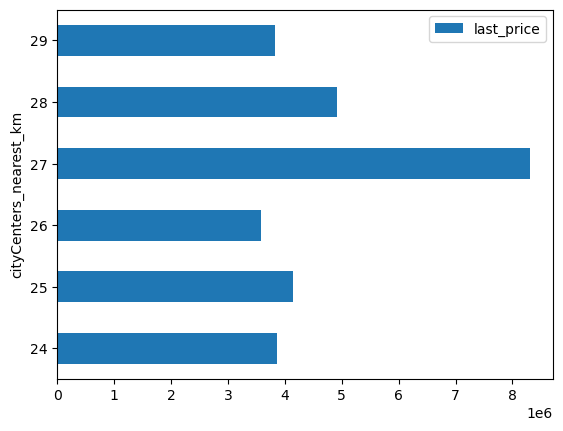

In [140]:
(df.query('cityCenters_nearest_km > 23 and locality_name == "Санкт-Петербург"')
             .pivot_table(index = 'cityCenters_nearest_km', values = 'last_price')
             .plot(kind = 'barh'));



**Видно, что, чем ближе к центру, тем квартиры дороже. По мере удаления от центра есть несильные различия в цене**

### Общий вывод

Проделанная работа:
1. Привели данные в порядок. Убрали пропущенные значения в столбцах
2. Заполнили пропущенные значения нулями или медианой
3. Избавились от выбросов в данных
4. Избавились от неявных дубликатов в столбце locality_name
5. Добавили в таблицу цену за квадратный метр, день, месяц и год публикации, тип этажа квартиры, расстояние в км до центра города
6. Изучили распределения площадей: общая, жилая, кухня; Посмотрели, как распределяется цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, и прочее.
7. Изучили как быстро продавались квартиры. Большинство квартир продавалось от 0 до 100 дней, изучили основные характеристики распределения: среднее и медиану. Если ориентироваться на 25 и 75 квантили, то быстрыми продажами можно назвать продажи в сроках от 22 до 45 дней. Долгими продажами считаем сроки от 117 до 193.
8. Изучили взаимосвязь различных факторов с общей стоимостью квартиры, построили матрицу корреляции и отдельно исследовали каждую пару параметров. Выяснили, что лучше всего коррелируют общая и жил площадь с общей стоимостью. Также количество комнат и цена за квадратный метр имеют положительную корреляцию с общей стоимостью
9. Выявили топ-10 населенных пунктов по количеству объявлений о продажах квартиры, определили среднюю цену за квадратный метр по этой выборке. Самым "дорогим" населенным пунктом оказался Санкт-Петербург, а самым "дешевым" – Выборг. Наглядно отобразили полученную информацию на столбчатой диаграмме
10. По Санкт-Петербургу определили, что расстояние до центра напрямую влияет на цену. Хоть после определенного момента удаления от центра цены не особо отличаются, зато четко прослеживается связь при приблежении к центру – там квартиры намного дороже. На 27 километре обнаружена аномалия – квартиры в диапазоне 27 километра стоят от 3 до 8 млн, в то время как аномальная - 15 млн. Она не влияет на итоговый вывод, так как она одна из всей выборки такая особенная

Рекомендации: Повысить качество сбора данных (минимизировать количество пропущенных значений и выбросов)
